<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Time_Series/Suavizacion_exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])


In [ ]:
df['year'] = df['date'].apply(lambda x:pd.Timestamp(x).strftime('%Y'))


In [ ]:
anual = df.groupby(by=['year']).sum().reset_index()


In [ ]:
anual['MA'] = anual['value'].rolling(window=3).mean().shift()

In [ ]:
anual['year'] = anual['year'].astype(int)
anual['value'] = anual['value'].astype(float)
anual['MA'] = anual['MA'].astype(float)
anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


# Suavizacion exponencial

In [ ]:
# pip install statsmodels
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
m = SimpleExpSmoothing(anual['value']).fit(smoothing_level = 0.3, optimized=False)
anual['ES'] = m.fittedvalues
anual

,year,value,MA,ES
0,1991,21.442946,NaN,21.442946
1,1992,45.686946,NaN,21.442946
2,1993,55.532688,NaN,28.716146
3,1994,60.816080,40.887527,36.761108
4,1995,67.326599,54.011905,43.977600
5,1996,77.397927,61.225122,50.982300
6,1997,85.131672,68.513535,58.906988
7,1998,93.310626,76.618732,66.774393
8,1999,105.959043,85.280075,74.735263
9,2000,122.496586,94.800447,84.102397


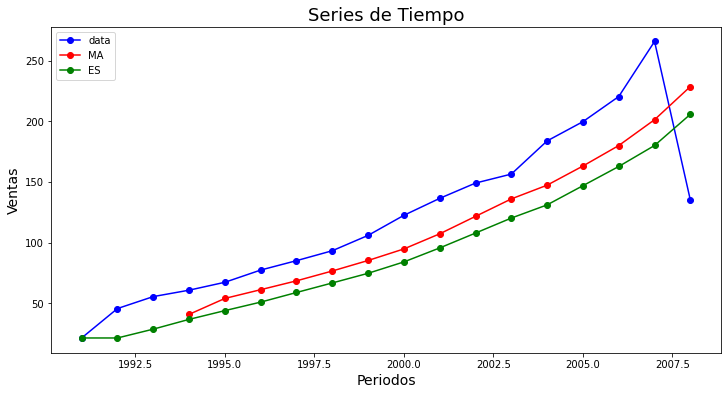

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(anual['year'], anual['value'], '-o', color='blue', label='data')
plt.plot(anual['year'], anual['MA'], '-o', color='red', label='MA')
plt.plot(anual['year'], anual['ES'], '-o', color='green', label='ES')


plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

**Error**


In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
y_true = anual['value']
y_ma = anual['MA']
y_es = anual['ES']

In [ ]:
# Error medias moviles
MSE(y_true[3:], y_ma[3:])

1453.9206702093302

In [ ]:
# Error suavizacion exponencial
MSE(y_true, y_es)

1826.0174231119786

optimizamos


In [ ]:
m = SimpleExpSmoothing(anual['value']).fit(optimized=True)
anual['ES'] = m.fittedvalues
anual

,year,value,MA,ES
0,1991,21.442946,NaN,28.933811
1,1992,45.686946,NaN,23.481982
2,1993,55.532688,NaN,39.642689
3,1994,60.816080,40.887527,51.207382
4,1995,67.326599,54.011905,58.200564
5,1996,77.397927,61.225122,64.842465
6,1997,85.131672,68.513535,73.980293
7,1998,93.310626,76.618732,82.096233
8,1999,105.959043,85.280075,90.258034
9,2000,122.496586,94.800447,101.685181


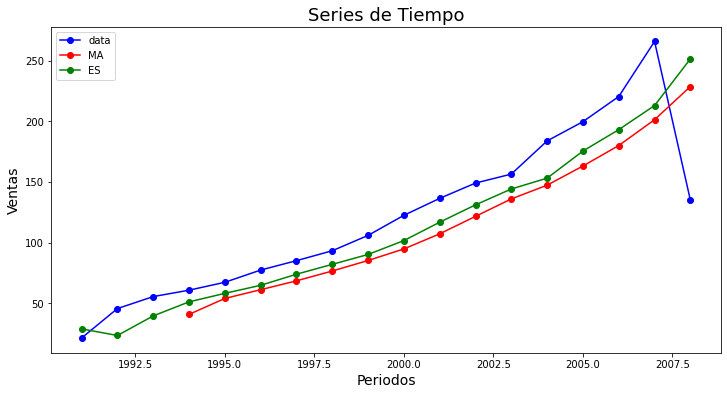

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(anual['year'], anual['value'], '-o', color='blue', label='data')
plt.plot(anual['year'], anual['MA'], '-o', color='red', label='MA')
plt.plot(anual['year'], anual['ES'], '-o', color='green', label='ES')


plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

In [ ]:
y_es = anual['ES']
MSE(y_true, y_es)

1195.0229335122276

In [ ]:
m.summary()

Dep. Variable:,endog,No. Observations:,18
Model:,SimpleExpSmoothing,SSE,21510.413
Optimized:,True,AIC,131.547
Trend:,None,BIC,133.327
Seasonal:,None,AICC,134.623
Seasonal Periods:,None,Date:,"Thu, 13 Jan 2022"
Box-Cox:,False,Time:,13:24:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7277970,alpha,True
initial_level,28.933811,l.0,True


In [ ]:
m.params_formatted

,name,param,optimized
smoothing_level,alpha,0.727797,True
initial_level,l.0,28.933811,True


Predecir


In [ ]:
pred = m.forecast(5)
pred

18    166.697052
19    166.697052
20    166.697052
21    166.697052
22    166.697052
dtype: float64

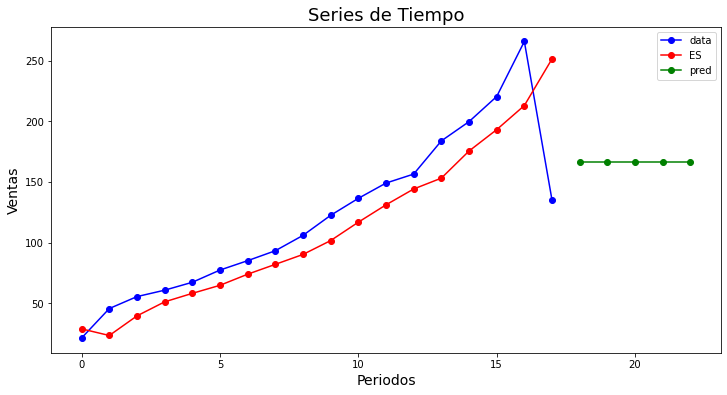

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(anual.index, anual['value'], '-o', color='blue', label='data')
plt.plot(anual.index, anual['ES'], '-o', color='red', label='ES')
plt.plot(pred, '-o', color='green', label='pred')


plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

In [ ]:
expo_s = pd.concat([anual['ES'], pred])
expo_s

0      28.933811
1      23.481982
2      39.642689
3      51.207382
4      58.200564
5      64.842465
6      73.980293
7      82.096233
8      90.258034
9     101.685181
10    116.831659
11    131.122523
12    144.181831
13    153.120947
14    175.448295
15    193.066296
16    212.926697
17    251.348753
18    166.697052
19    166.697052
20    166.697052
21    166.697052
22    166.697052
dtype: float64

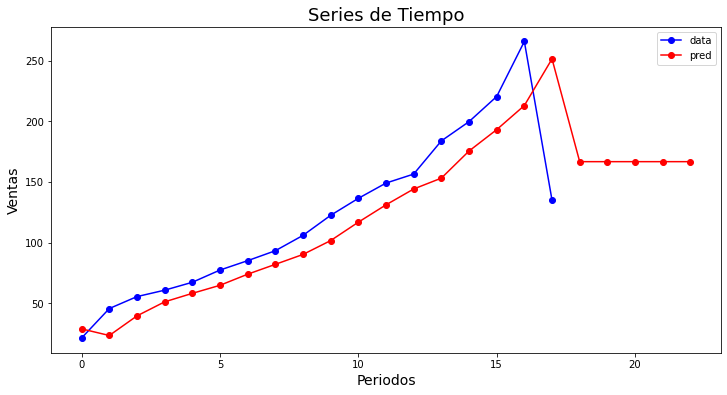

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(anual.index, anual['value'], '-o', color='blue', label='data')
plt.plot(expo_s, '-o', color='red', label='pred')


plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

# Bilioteca para trabajr datos


In [ ]:
!pip install mitosheet
import mitosheet

     |████████████████████████████████| 3.9 MB 8.0 MB/s 
     |████████████████████████████████| 7.9 MB 36.1 MB/s 
     |████████████████████████████████| 22.9 MB 2.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

In [ ]:
mitosheet.sheet(df)

MitoWidget(analysis_data_json='{"analysisName": "UUID-ccd5b230-a549-41ca-b79f-8e21ba0f5fad", "code": {"imports…

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
!pip install mitosheet
import mitosheet
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

In [ ]:
mitosheet.sheet(df)

MitoWidget(analysis_data_json='{"analysisName": "UUID-353e4e7d-5e57-458f-8e3b-d547274efa1a", "code": {"imports…

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()